Red Wine Classification Proposal

By DSCI 100, Group 39

This project aims to classify bottles of wine based on their chemical properties and identify the accuracy with which the predrictions are made. 

In [17]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [18]:
#read the dataset in Jupyter
red_wine <- read.csv2("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")

In [19]:
#make quality (originally ranked from 1-10) a categorical variable 
red_wine <- red_wine %>%
    mutate(quality = case_when(quality == "10" ~ "Excellent",
                              quality == "9" ~ "Excellent",
                              quality == "8" ~ "Good",
                              quality == "7" ~ "Good",
                              quality == "6" ~ "Satisfactory",
                              quality == "5" ~ "Satisfactory",
                              quality == "4" ~ "Bad",
                              quality == "3" ~ "Bad",
                              quality == "2" ~ "Poor",
                              quality == "1" ~ "Poor"))

In [20]:
#we will be treating quality as a categorical variable, so we converted into a factor
#we converted the rest of the variables into numerical variables
red_wine <- red_wine %>% 
    mutate(fixed.acidity = as.numeric(fixed.acidity)) %>% 
    mutate(volatile.acidity = as.numeric(volatile.acidity)) %>% 
    mutate(citric.acid = as.numeric(citric.acid)) %>% 
    mutate(residual.sugar = as.numeric(residual.sugar)) %>% 
    mutate(chlorides = as.numeric(chlorides)) %>% 
    mutate(free.sulfur.dioxide = as.numeric(free.sulfur.dioxide)) %>% 
    mutate(total.sulfur.dioxide = as.numeric(total.sulfur.dioxide)) %>% 
    mutate(density = as.numeric(density)) %>% 
    mutate(pH = as.numeric(pH)) %>% 
    mutate(sulphates = as.numeric(sulphates)) %>% 
    mutate(alcohol = as.numeric(alcohol)) %>% 
    mutate(quality = as.factor(quality))

In [21]:
#create a filtered dataset by quality for each classification
#note that red_wine has no inputs for "Excellent" and "Poor"
good_class <- red_wine %>% 
    filter(quality == "Good")
good_class

satisfactory_class <- red_wine %>% 
    filter(quality == "Satisfactory")
satisfactory_class

bad_class <- red_wine %>% 
    filter(quality == "Bad")
bad_class

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,Good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,Good
8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.30,0.75,10.5,Good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.40,Good
7.0,0.56,0.17,1.7,0.065,15,24,0.99514,3.44,0.68,10.55,Good
6.7,0.32,0.44,2.4,0.061,24,34,0.99484,3.29,0.80,11.60,Good


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Satisfactory
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,Satisfactory
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,Satisfactory
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,Satisfactory
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.59,0.08,4.4,0.086,6,29,0.9974,3.38,0.50,9.0,Bad
5.7,1.13,0.09,1.5,0.172,7,19,0.9940,3.50,0.48,9.8,Bad
8.8,0.61,0.30,2.8,0.088,17,46,0.9976,3.26,0.51,9.3,Bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.8,0.91,0.06,2.0,0.060,4,11,0.99592,3.53,0.64,10.90,Bad
6.7,0.76,0.02,1.8,0.078,6,12,0.99600,3.55,0.63,9.95,Bad
6.9,0.48,0.20,1.9,0.082,9,23,0.99585,3.39,0.43,9.05,Bad


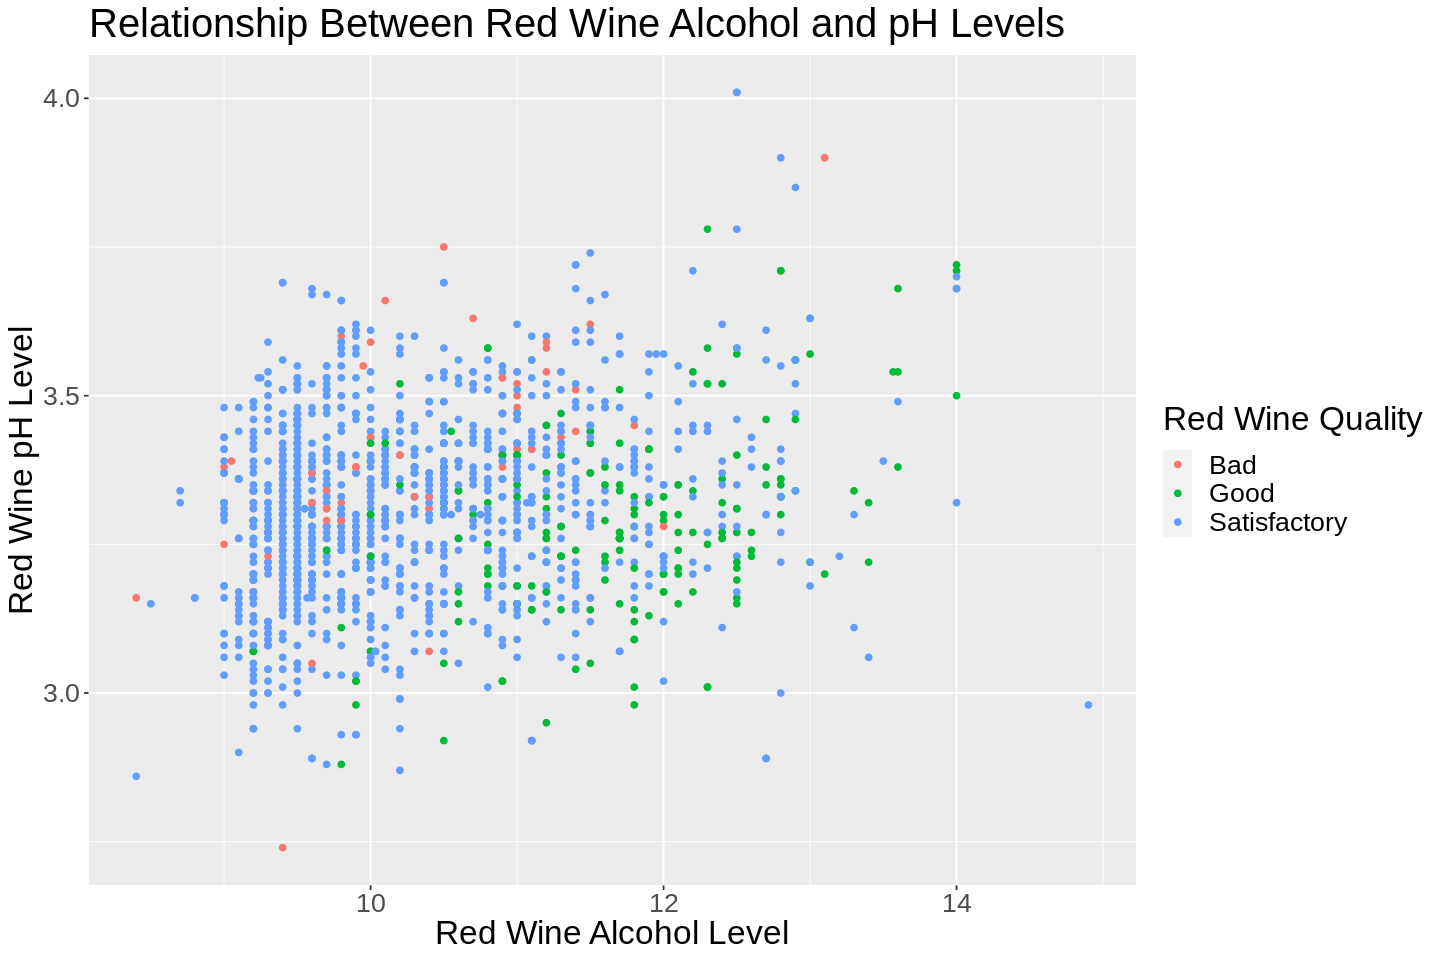

In [42]:
options(repr.plot.width = 12, repr.plot.height = 8)
initial_plot <- red_wine %>% 
    ggplot(aes(x = alcohol, y = pH, color = quality)) +
    geom_point() +
    labs(x = "Red Wine Alcohol Level", y = "Red Wine pH Level", color = "Red Wine Quality") +
    ggtitle("Relationship Between Red Wine Alcohol and pH Levels") +
    theme(text = element_text(size = 20))
initial_plot